## Analise comparativa entre sabesp e caixadagua

Primeiramente vamos realizar as importações dos pacotes necessários para a análise.
Após vamos carregar ambos os dados, da caixa d'agua e da sabesp

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
dfs = pd.read_csv('/Users/felipe.miziara/Documents/IPT/IOT/turbidez_sabesp3.csv', sep=';')
dfc = pd.read_csv('/Users/felipe.miziara/Documents/IPT/IOT/turbidez_caixa3.csv', sep=';')

#Corrigindo os tipos das colunas de tempo

dfs['Timestamp'] =  pd.to_datetime(dfs['Timestamp'])
dfc['Timestamp'] =  pd.to_datetime(dfc['Timestamp'])

#Limpando linhas sem data
if dfs['Timestamp'].isnull().any():
    dfs.dropna(subset=['Timestamp'], inplace=True) 
    
if dfc['Timestamp'].isnull().any():
    dfc.dropna(subset=['Timestamp'], inplace=True) 

#Limpando linhas sem valor
if dfs['Voltage'].isnull().any():
    dfs.dropna(subset=['Voltage'], inplace=True) 
    
if dfc['Voltage'].isnull().any():
    dfc.dropna(subset=['Voltage'], inplace=True) 

dfs['Grupos'] = dfs['Timestamp'].dt.floor('6min')
dfc['Grupos'] = dfc['Timestamp'].dt.floor('6min')
dfs.shape

(21051, 8)

In [3]:
dfc.shape

(25975, 8)

## Agrupando pelos intervalos de 6 min e removendo outliers


In [4]:
def remove_outliers_iqr(group):
    Q1 = group['Voltage'].quantile(0.15)
    Q3 = group['Voltage'].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[((group['Voltage'] >= lower_bound) & (group['Voltage'] <= upper_bound))]

dfs_agrupado = dfs.groupby('Grupos')
dfc_agrupado = dfc.groupby('Grupos')

# Aplique a função aos seus dados agrupados
dfsFiltrado = dfs_agrupado.apply(remove_outliers_iqr, include_groups=False)
dfcFiltrado = dfc_agrupado.apply(remove_outliers_iqr, include_groups=False)


# Visualize os resultados
dfsFiltrado.head()

2024-08-06


Timestamp   Voltage Sensor  Valor  \
Grupos                                                              
2024-07-14 14:24:00 0 2024-07-14 14:27:18  0.518926    NaN    NaN   
                    1 2024-07-14 14:27:23  0.000000    NaN    NaN   
                    2 2024-07-14 14:27:28  0.000000    NaN    NaN   
                    3 2024-07-14 14:27:33  0.000000    NaN    NaN   
                    4 2024-07-14 14:27:38  0.000000    NaN    NaN   

                      Consumo Humano Consumo Animal Consumo Plantas  
Grupos                                                               
2024-07-14 14:24:00 0            NaN            NaN             NaN  
                    1            NaN            NaN             NaN  
                    2            NaN            NaN             NaN  
                    3            NaN            NaN             NaN  
                    4            NaN            NaN             NaN

In [5]:
dfsFinal = dfsFiltrado.groupby('Grupos')['Voltage'].agg(['mean', 'std', 'min', 'max'])
dfcFinal = dfcFiltrado.groupby('Grupos')['Voltage'].agg(['mean', 'std', 'min', 'max'])

dfsFinal.describe()

,mean,std,min,max
count,432.000000,425.000000,432.000000,432.000000
mean,3.472027,0.056468,3.382984,3.548954
std,0.737076,0.228118,0.771677,0.781341
min,0.000000,0.000000,-0.000875,0.000000
25%,3.168560,0.000262,3.153094,3.181531
50%,3.300000,0.000466,3.300000,3.306375
75%,3.755200,0.001056,3.748000,3.757031
max,5.000000,2.139566,5.000000,5.000000


In [6]:
dfcFinal.describe()

,mean,std,min,max
count,464.000000,463.000000,464.000000,464.000000
mean,3.155982,0.093705,2.991338,3.250447
std,0.670521,0.315702,0.914461,0.652906
min,0.000000,0.000000,-0.258750,0.000000
25%,3.083349,0.000254,3.028094,3.092000
50%,3.124214,0.000455,3.096063,3.253438
75%,3.509681,0.013669,3.498625,3.530782
max,5.000000,2.216279,5.000000,5.000000


## Analisando o período, comparando o sensor de entrega com o de saída

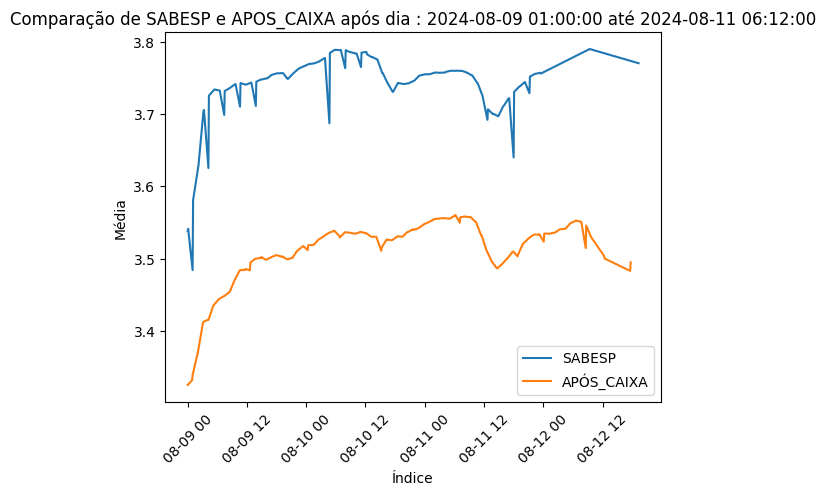

In [19]:
data_especifica = '2024-08-09'

dfsJanela = dfsFinal[dfsFinal.index.date >= pd.to_datetime(data_especifica).date()]
dfcJanela = dfcFinal[dfcFinal.index.date >= pd.to_datetime(data_especifica).date()]

min_data = dfsJanela.idxmin()
max_data = dfcJanela.idxmax()

#if not dfsJanela.index.equals(dfcJanela.index):
  # Reindexar dfcJanela se necessário
#  dfcJanela = dfcJanela.reindex(dfsJanela.index)

# Plotar os dados de dfsJanela
plt.plot(dfsJanela.index, dfsJanela['mean'], label='SABESP')

# Plotar os dados de dfcJanela
plt.plot(dfcJanela.index, dfcJanela['mean'], label='APÓS_CAIXA')

# Adicionar título, legenda e rótulos dos eixos
plt.title('Comparação de SABESP e APOS_CAIXA após dia : ' + str(min_data['min']) + ' até ' + str(max_data['max']))
plt.xlabel('Índice')
plt.ylabel('Média')
#plt.xticks(dfsJanela.index)
plt.xticks(rotation=45)
plt.legend()

# Mostrar o gráfico
plt.show()

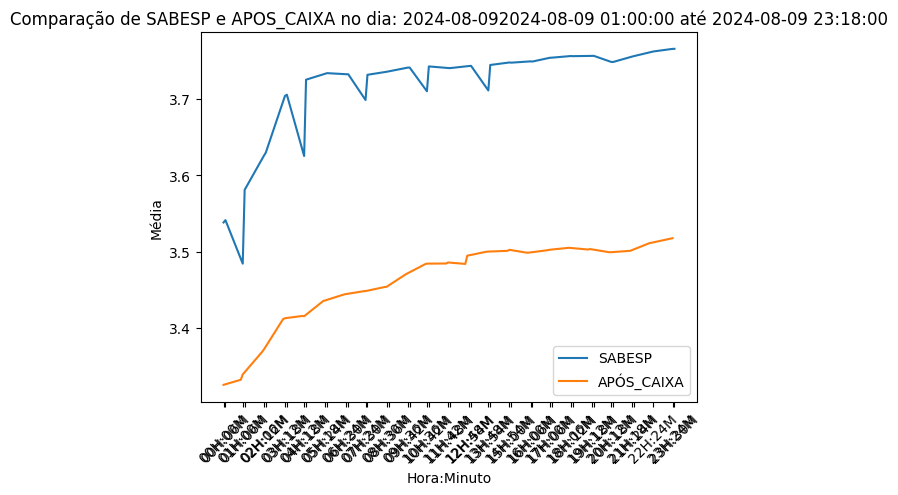

In [8]:
data_especifica = '2024-08-09'

dfsJanela = dfsFinal[dfsFinal.index.date == pd.to_datetime(data_especifica).date()]
dfcJanela = dfcFinal[dfcFinal.index.date == pd.to_datetime(data_especifica).date()]

min_data = dfsJanela.idxmin()
max_data = dfcJanela.idxmax()

#if not dfsJanela.index.equals(dfcJanela.index):
  # Reindexar dfcJanela se necessário
#  dfcJanela = dfcJanela.reindex(dfsJanela.index)

date_form = DateFormatter("%HH:%MM")
plt.gca().xaxis.set_major_formatter(date_form)

# Plotar os dados de dfsJanela
plt.plot(dfsJanela.index, dfsJanela['mean'], label='SABESP')

# Plotar os dados de dfcJanela
plt.plot(dfcJanela.index, dfcJanela['mean'], label='APÓS_CAIXA')

# Adicionar título, legenda e rótulos dos eixos
plt.title('Comparação de SABESP e APOS_CAIXA no dia: '+ data_especifica  + str(min_data['min']) + ' até ' + str(max_data['max']))
plt.xlabel('Hora:Minuto')
plt.ylabel('Média')
plt.xticks(dfsJanela.index)
plt.xticks(rotation=45)
#plt.figure(figsize=(12, 6))
plt.legend()

# Mostrar o gráfico
plt.show()

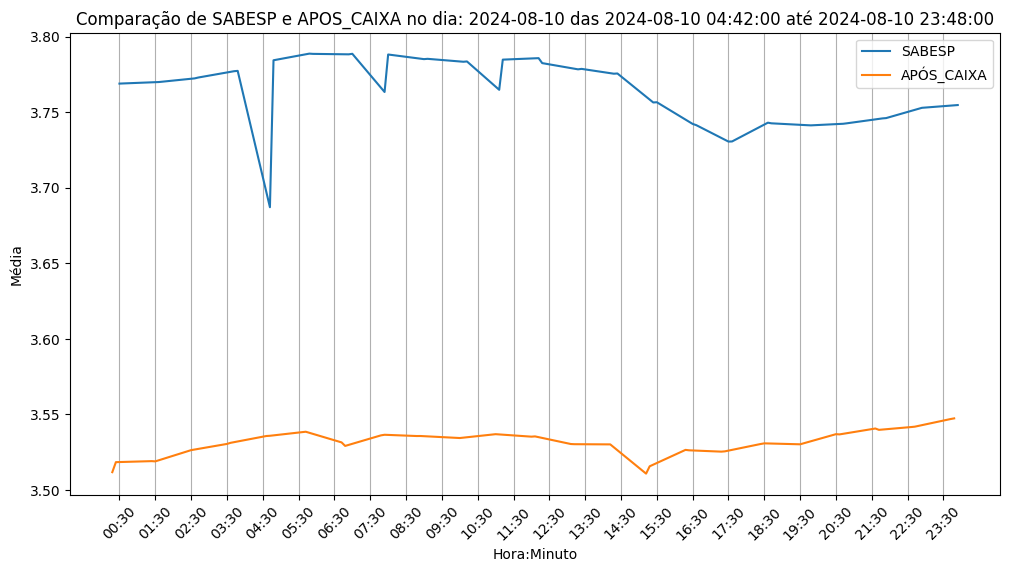

In [22]:
import matplotlib.dates as mdates

data_especifica = '2024-08-10'

dfsJanela = dfsFinal[dfsFinal.index.date == pd.to_datetime(data_especifica).date()]
dfcJanela = dfcFinal[dfcFinal.index.date == pd.to_datetime(data_especifica).date()]

min_data = dfsJanela.idxmin()
max_data = dfcJanela.idxmax()

# Converter os índices para datetime
dfsJanela.index = pd.to_datetime(dfsJanela.index)
dfcJanela.index = pd.to_datetime(dfcJanela.index)

plt.figure(figsize=(12, 6))

# Utilizar mdates.DateFormatter
date_form = mdates.DateFormatter("%H:%M")
plt.gca().xaxis.set_major_formatter(date_form)


# Plotar os dados de dfsJanela
plt.plot(dfsJanela.index, dfsJanela['mean'], label='SABESP')

# Plotar os dados de dfcJanela
plt.plot(dfcJanela.index, dfcJanela['mean'], label='APÓS_CAIXA')

# Adicionar título, legenda e rótulos dos eixos
plt.title('Comparação de SABESP e APOS_CAIXA no dia: '+ data_especifica + ' das ' + str(min_data['min']) + ' até ' + str(max_data['max']))
plt.xlabel('Hora:Minuto')
plt.ylabel('Média')
plt.xticks(pd.date_range(dfsJanela.index.min(), dfsJanela.index.max(), freq='h')) 
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.legend()

# Mostrar o gráfico
plt.show()

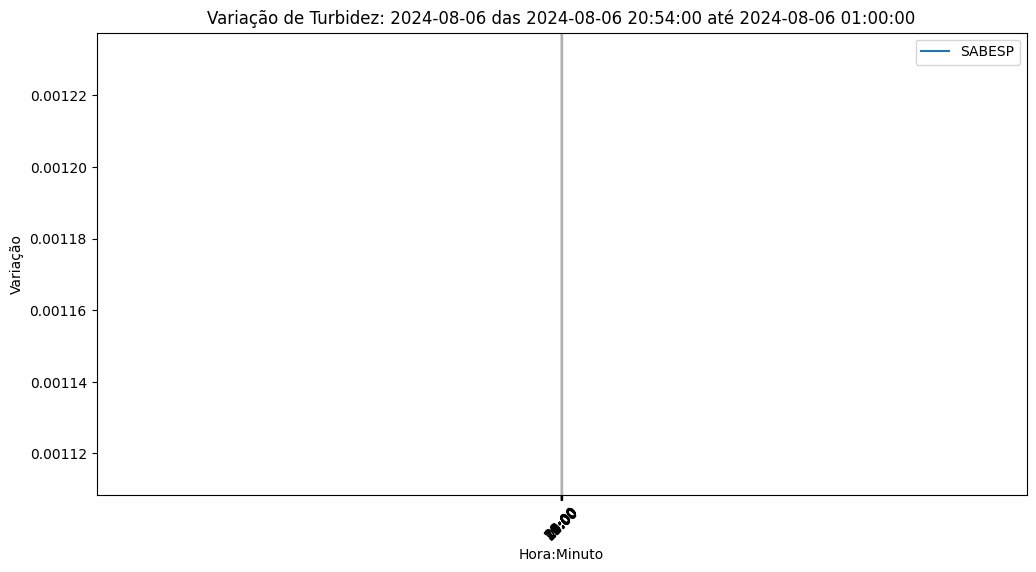

In [10]:
# Calcular a variação de voltagem

dfsJanela_hora = dfsJanela.resample('h').mean()
dfcJanela_hora = dfcJanela.resample('h').mean()

variacao_voltagem = dfsJanela_hora['mean'] - dfcJanela_hora['mean']

plt.figure(figsize=(12, 6))

date_form = mdates.DateFormatter("%H:%M")
plt.gca().xaxis.set_major_formatter(date_form)

# Criar um novo DataFrame com os resultados
df_variacao = pd.DataFrame({'Variacao': variacao_voltagem}, index=dfsJanela_hora.index)

# Plotar os dados de dfsJanela
plt.plot(df_variacao.index, df_variacao['Variacao'], label='SABESP')

plt.title('Variação de Turbidez: '+ data_especifica + ' das ' + str(min_data['min']) + ' até ' + str(max_data['max']))
plt.xlabel('Hora:Minuto')
plt.ylabel('Variação')
plt.xticks(pd.date_range(df_variacao.index.min(), df_variacao.index.max(), freq='h')) 
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.legend()

In [11]:
df_variacao.describe()

,Variacao
count,1.000000
mean,0.001173
std,NaN
min,0.001173
25%,0.001173
50%,0.001173
75%,0.001173
max,0.001173


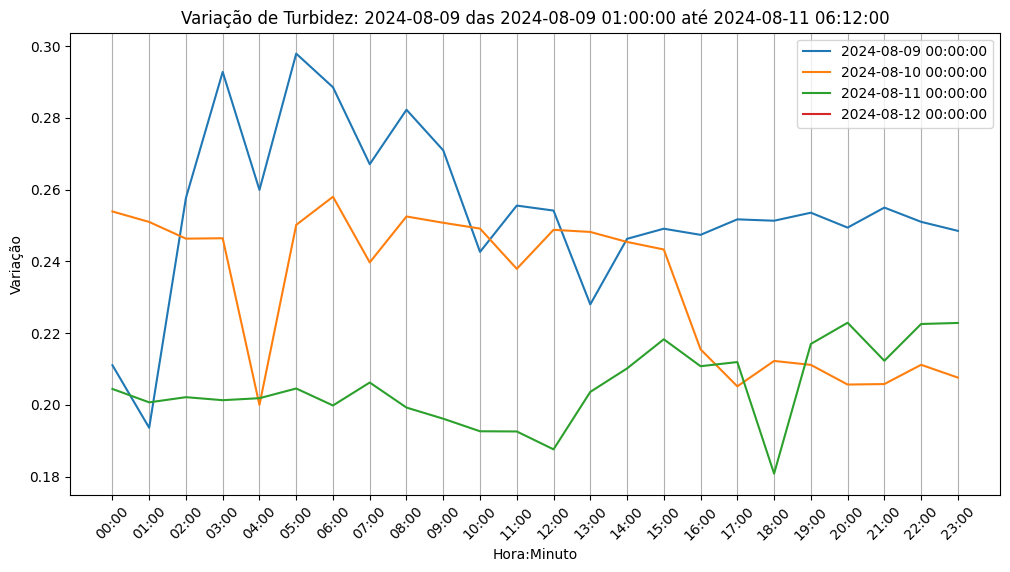

In [12]:
data_especifica = '2024-08-09'

dfsJanela = dfsFinal[dfsFinal.index.date >= pd.to_datetime(data_especifica).date()]
dfcJanela = dfcFinal[dfcFinal.index.date >= pd.to_datetime(data_especifica).date()]

min_data = dfsJanela.idxmin()
max_data = dfcJanela.idxmax()

dfsJanela.reset_index();
dfcJanela.reset_index();

def agrupar_por_dia_e_hora(grupo):
    return grupo.resample('h').mean() 

dfs_agrupado_por_dia_e_hora = dfsJanela.groupby(pd.Grouper(freq='D')).apply(agrupar_por_dia_e_hora)
dfc_agrupado_por_dia_e_hora = dfcJanela.groupby(pd.Grouper(freq='D')).apply(agrupar_por_dia_e_hora)

plt.figure(figsize=(12, 6))

#print(dfs_agrupado_por_dia_e_hora.index.levels[1].strftime('%H:%M').unique())

for valor in dfs_agrupado_por_dia_e_hora.index.get_level_values(0).unique():
    dfs_filtrado = dfs_agrupado_por_dia_e_hora.xs(valor, level=0)
    dfc_filtrado = dfc_agrupado_por_dia_e_hora.xs(valor, level=0)
    
    variacao_voltagem = dfs_filtrado['mean'] - dfc_filtrado['mean']
    
    variacao_voltagem.index = variacao_voltagem.index.strftime('%H:%M')
    
    df_variacao = pd.DataFrame({'Variacao': variacao_voltagem}, index=variacao_voltagem.index)
    
    plt.plot(df_variacao.index, df_variacao['Variacao'], label=valor)


x_ticks_labels = dfs_agrupado_por_dia_e_hora.index.levels[1].strftime('%H:%M').unique()
plt.title('Variação de Turbidez: '+ data_especifica + ' das ' + str(min_data['min']) + ' até ' + str(max_data['max']))
plt.xlabel('Hora:Minuto')
plt.ylabel('Variação')

plt.xticks(x_ticks_labels) 
plt.xticks(rotation=45) 
plt.grid(axis='x')

plt.legend()
    


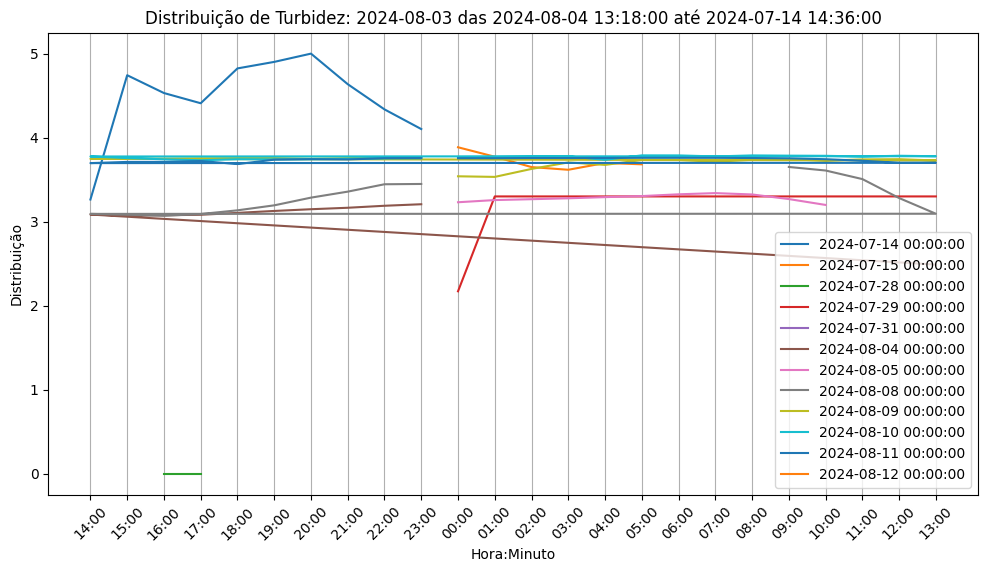

In [17]:
data_especifica = '2024-08-03'

#dfsJanela = dfsFinal[dfsFinal.index.date >= pd.to_datetime(data_especifica).date()]

dfsJanela = dfsFinal

min_data = dfsJanela.idxmin()
max_data = dfsJanela.idxmax()

dfsJanela.reset_index();

def agrupar_por_dia_e_hora(grupo):
    return grupo.resample('h').mean() 

dfs_agrupado_por_dia_e_hora = dfsJanela.groupby(pd.Grouper(freq='D')).apply(agrupar_por_dia_e_hora)

#Remover dia bugado
diaBugado = pd.to_datetime('2024-08-06')
dfs_agrupado_por_dia_e_hora = dfs_agrupado_por_dia_e_hora.drop(diaBugado)

plt.figure(figsize=(12, 6))

for valor in dfs_agrupado_por_dia_e_hora.index.get_level_values(0).unique():
    dfs_filtrado = dfs_agrupado_por_dia_e_hora.xs(valor, level=0)
        
    dfs_filtrado.index = dfs_filtrado.index.strftime('%H:%M')
    
    plt.plot(dfs_filtrado.index, dfs_filtrado['mean'], label=valor)


x_ticks_labels = dfs_agrupado_por_dia_e_hora.index.levels[1].strftime('%H:%M').unique()
plt.title('Distribuição de Turbidez: '+ data_especifica + ' das ' + str(min_data['min']) + ' até ' + str(max_data['max']))
plt.xlabel('Hora:Minuto')
plt.ylabel('Distribuição')

plt.xticks(x_ticks_labels) 
plt.xticks(rotation=45) 
plt.grid(axis='x')

plt.legend()
    
